<a href="https://colab.research.google.com/github/lahari465/gitbooks/blob/master/Chicago_Crime_Rate_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet


In [ ]:
    pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prophet as ph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [15]:
!ls "/content/drive/MyDrive/Colab Notebooks"


'Chicago Crime Rate Prediction .ipynb'	'linear and logistic regression.ipynb'
 Chicago_Crimes_2001_to_2004.csv.zip	 Msme.ipynb
 knn.ipynb				 Notebook2.ipynb


In [18]:
data1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Chicago_Crimes_2001_to_2004.csv.zip",on_bad_lines='skip')

/tmp/ipython-input-493488225.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Chicago_Crimes_2001_to_2004.csv.zip",on_bad_lines='skip')


In [ ]:
#Concat the datasets
#data = pd.concat([data1,data2,data3])

In [ ]:
#display top 5 Rows of the dataset

Display top 5 Rows of the dataset

In [20]:
data1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [21]:
#last 5 rows
data1.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1923510,6252586,4781176,HM386461,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,...,37.0,19.0,06,1140960.0,1915056.0,2001.0,06/14/2006 04:14:16 AM,41.922997,-87.757492,"(41.922996623, -87.757491503)"
1923511,6252606,4671197,HM270817,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,38.0,15.0,06,1133528.0,1929634.0,2003.0,04/15/2016 08:55:02 AM,41.963134,-87.784457,"(41.963133955, -87.784456675)"
1923512,6252728,4671380,HM269330,08/01/2002 09:00:00 AM,020XX W 82ND PL,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,18.0,71.0,06,1164056.0,1849944.0,2002.0,04/15/2016 08:55:02 AM,41.743865,-87.674464,"(41.743865444, -87.674463733)"
1923513,6253372,4782588,HM394550,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,...,10.0,46.0,05,1196570.0,1847474.0,2001.0,07/05/2006 04:01:36 AM,41.736343,-87.555413,"(41.736342659, -87.555413094)"
1923514,6254041,4673324,HM274913,08/09/2002 03:00:00 PM,067XX S CHAMPLAIN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,20.0,42.0,06,1181728.0,1860492.0,2002.0,04/15/2016 08:55:02 AM,41.772421,-87.609387,"(41.772420712, -87.609387104)"


Find shape of Our Dataset(no.of rows & columns)

data1().shape - tuple calling not available (check it)

In [24]:
data1.shape

(1923515, 23)

In [25]:
print("Number of Rows",data1.shape[0])
print("Number of Columns", data1.shape[1])

Number of Rows 1923515
Number of Columns 23


*4. Get information about our dataset like total no.of Rows, total no.of columns, datatypes of each Column and Memory requirement.*

In [26]:
data1.info

<bound method DataFrame.info of          Unnamed: 0       ID Case Number                    Date  \
0               879  4786321    HM399414  01/01/2004 12:01:00 AM   
1              2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2              2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3              2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4              3302  4677901    HM275615  05/01/2003 01:00:00 AM   
...             ...      ...         ...                     ...   
1923510     6252586  4781176    HM386461  04/01/2001 09:00:00 AM   
1923511     6252606  4671197    HM270817  09/01/2003 12:01:00 AM   
1923512     6252728  4671380    HM269330  08/01/2002 09:00:00 AM   
1923513     6253372  4782588    HM394550  06/04/2001 12:01:00 AM   
1923514     6254041  4673324    HM274913  08/09/2002 03:00:00 PM   

                         Block  IUCR                Primary Type  \
0            082XX S COLES AVE  0840                       THEFT   
1              004XX W 42ND PL  2825               OTHER OFFENSE   
2          025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3           045XX W MONTANA ST  0840                       THEFT   
4           111XX S NORMAL AVE  0841                       THEFT   
...                        ...   ...                         ...   
1923510    023XX N LATROBE AVE  0841                       THEFT   
1923511     045XX N MOBILE AVE  0840                       THEFT   
1923512        020XX W 82ND PL  0840                       THEFT   
1923513   087XX S MUSKEGON AVE  0610                    BURGLARY   
1923514  067XX S CHAMPLAIN AVE  0840                       THEFT   

                            Description Location Description  Arrest  ...  \
0         FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   
1               HARASSMENT BY TELEPHONE            RESIDENCE   False  ...   
2         AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   False  ...   
3         FINANCIAL ID THEFT: OVER $300                OTHER   False  ...   
4        FINANCIAL ID THEFT:$300 &UNDER            RESIDENCE   False  ...   
...                                 ...                  ...     ...  ...   
1923510  FINANCIAL ID THEFT:$300 &UNDER                ALLEY   False  ...   
1923511   FINANCIAL ID THEFT: OVER $300            APARTMENT   False  ...   
1923512   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   
1923513                  FORCIBLE ENTRY                OTHER   False  ...   
1923514   FINANCIAL ID THEFT: OVER $300            APARTMENT   False  ...   

         Ward  Community Area  FBI Code  X Coordinate  Y Coordinate    Year  \
0         7.0            46.0        06           NaN           NaN  2004.0   
1        11.0            61.0        26     1173974.0     1876757.0  2003.0   
2        35.0            22.0        20           NaN           NaN  2004.0   
3        31.0            20.0        06           NaN           NaN  2004.0   
4        34.0            49.0        06     1174948.0     1831051.0  2003.0   
...       ...             ...       ...           ...           ...     ...   
1923510  37.0            19.0        06     1140960.0     1915056.0  2001.0   
1923511  38.0            15.0        06     1133528.0     1929634.0  2003.0   
1923512  18.0            71.0        06     1164056.0     1849944.0  2002.0   
1923513  10.0            46.0        05     1196570.0     1847474.0  2001.0   
1923514  20.0            42.0        06     1181728.0     1860492.0  2002.0   

                     Updated On   Latitude  Longitude  \
0        08/17/2015 03:03:40 PM        NaN        NaN   
1        04/15/2016 08:55:02 AM  41.817229 -87.637328   
2        08/17/2015 03:03:40 PM        NaN        NaN   
3        08/17/2015 03:03:40 PM        NaN        NaN   
4        04/15/2016 08:55:02 AM  41.691785 -87.635116   
...                         ...        ...        ...   
1923510  06/14/2006 04:14:16 AM  41.922997 -87.757492   
1923

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

5.  Check the null values in the Dataset

In [28]:
data1.isnull()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923510,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1923511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1923512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1923513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
data1.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,16
Arrest,0


6. Select only the Necessary Columns

In [30]:
data1.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [31]:
df = data1[['ID','Date', 'Primary Type','Location Description', 'Arrest','Domestic' ]]

In [32]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,THEFT,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,OTHER OFFENSE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,THEFT,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,THEFT,RESIDENCE,False,False


7. Check Null Values in the Dataset

In [33]:
df.isnull().sum()

,0
ID,0
Date,0
Primary Type,0
Location Description,16
Arrest,0
Domestic,0


dropping the null values exist

In [34]:
df = df.dropna()

In [35]:
df.isnull().sum()

,0
ID,0
Date,0
Primary Type,0
Location Description,0
Arrest,0
Domestic,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923499 entries, 0 to 1923514
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 77.0+ MB


In [37]:
df.Date = pd.to_datetime(df.Date, format ='%m/%d/%Y %I:%M:%S %p')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923499 entries, 0 to 1923514
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 77.0+ MB


THE REAL PROJECT

8. Find the Top 10 Primary Crime Types

In [39]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [42]:
df['Primary Type'].value_counts().head(10)

,count
Primary Type,
THEFT,395393
BATTERY,363537
CRIMINAL DAMAGE,220297
NARCOTICS,210600
OTHER OFFENSE,123752
ASSAULT,121416
BURGLARY,101900
MOTOR VEHICLE THEFT,98923
ROBBERY,70986


10. How many criminals are arrested having primary crime type is Theft

In [44]:
df[df['Primary Type']== "THEFT"]

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,False,False
3,4789765,2004-12-30 20:00:00,THEFT,OTHER,False,False
4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,False,False
5,4838048,2004-08-01 00:01:00,THEFT,APARTMENT,False,False
8,4792195,2004-09-16 10:00:00,THEFT,RESIDENCE,False,False
...,...,...,...,...,...,...
1923509,4780874,2004-07-01 00:00:00,THEFT,APARTMENT,False,False
1923510,4781176,2001-04-01 09:00:00,THEFT,ALLEY,False,False
1923511,4671197,2003-09-01 00:01:00,THEFT,APARTMENT,False,False
1923512,4671380,2002-08-01 09:00:00,THEFT,RESIDENCE,False,False


In [45]:
df[df['Primary Type']== "THEFT"]['Arrest'].value_counts()

,count
Arrest,
False,340254
True,55139


10. Find the Top 10 Crime Location Descriptions

In [51]:
df['Location Description'].value_counts().head(10)

,count
Location Description,
STREET,584118
RESIDENCE,349772
APARTMENT,144214
SIDEWALK,140802
OTHER,78132
PARKING LOT/GARAGE(NON.RESID.),59123
"SCHOOL, PUBLIC, BUILDING",44898
ALLEY,43061
RESIDENCE-GARAGE,38931


11. How many of Are Arrested Havving Location Type is STREET

In [52]:
df['Location Description']=="STREET"

,Location Description
0,False
1,False
2,False
3,False
4,False
...,...
1923510,False
1923511,False
1923512,False
1923513,False


value.counts() method from pandas

In [53]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

,count
Arrest,
False,398782
True,185336


#date column before visualising

In [55]:
df.index = pd.DatetimeIndex(df.Date)

In [56]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,THEFT,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,False,False
...,...,...,...,...,...,...
2001-04-01 09:00:00,4781176,2001-04-01 09:00:00,THEFT,ALLEY,False,False
2003-09-01 00:01:00,4671197,2003-09-01 00:01:00,THEFT,APARTMENT,False,False
2002-08-01 09:00:00,4671380,2002-08-01 09:00:00,THEFT,RESIDENCE,False,False


Usage of matplotlib library now

Text(0, 0.5, 'No. of Crimes')

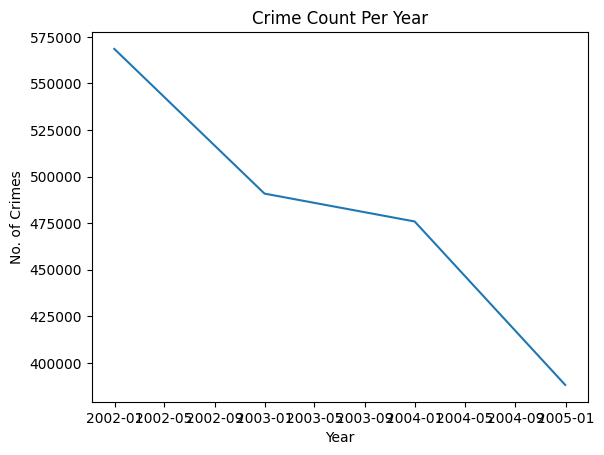

In [60]:
plt.plot(df.resample('YE').size())
plt.title("Crime Count Per Year")
plt.xlabel("Year")
plt.ylabel("No. of Crimes")

*Preparing data before Forecasting*

In [62]:
df_prop = pd.DataFrame(df.resample('ME').size().reset_index())

*MONTHLY CRIME REPORT*

In [63]:
df_prop

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53120
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


In [64]:
df_prop.columns = ['Date', 'Crime Count']

In [65]:
df_prop

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53120
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


Rename the Columns

*Input the facebook Prophet is always always *
*#ds and y*
ds- datestamp
y -  must always be numerical

In [66]:
df_prop= df_prop.rename(columns={'Date':'ds','Crime Count':'y'})

In [68]:
df_prop

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53120
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


Train the Model

In [76]:
from prophet import Prophet
M = Prophet()
M.fit(df_prop)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3c4hibn/1rzbc_rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3c4hibn/xnwq99sw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62306', 'data', 'file=/tmp/tmpv3c4hibn/1rzbc_rm.json', 'init=/tmp/tmpv3c4hibn/xnwq99sw.json', 'output', 'file=/tmp/tmpv3c4hibn/prophet_modelmauja6cf/prophet_model-20251022173435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:34:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Make the Predictions

In [77]:
pred =M.make_future_dataframe(periods=24, freq='M')

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [78]:
forecast = M.predict(pred)

In [79]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,45272.306645,54831.739632,71612.656383,45272.306645,45272.306645,17657.256621,17657.256621,17657.256621,17657.256621,17657.256621,17657.256621,0.0,0.0,0.0,62929.563266
1,2001-02-28,44973.522999,38442.945124,55981.355671,44973.522999,44973.522999,2270.229758,2270.229758,2270.229758,2270.229758,2270.229758,2270.229758,0.0,0.0,0.0,47243.752757
2,2001-03-31,44642.726818,30439.085585,46916.458004,44642.726818,44642.726818,-6107.081565,-6107.081565,-6107.081565,-6107.081565,-6107.081565,-6107.081565,0.0,0.0,0.0,38535.645253
3,2001-04-30,44322.601483,25885.268472,42489.822722,44322.601483,44322.601483,-10415.304508,-10415.304508,-10415.304508,-10415.304508,-10415.304508,-10415.304508,0.0,0.0,0.0,33907.296975
4,2001-05-31,43991.805300,37863.923234,55028.657843,43991.805300,43991.805300,2263.205981,2263.205981,2263.205981,2263.205981,2263.205981,2263.205981,0.0,0.0,0.0,46255.011282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2006-08-31,23527.454026,21329.743933,38615.164444,23527.330905,23527.564323,6513.588417,6513.588417,6513.588417,6513.588417,6513.588417,6513.588417,0.0,0.0,0.0,30041.042443
68,2006-09-30,23207.372873,19584.983737,36985.386982,23207.241006,23207.494821,5232.600555,5232.600555,5232.600555,5232.600555,5232.600555,5232.600555,0.0,0.0,0.0,28439.973428
69,2006-10-31,22876.622348,21662.068056,39589.422192,22876.478860,22876.753984,7461.400395,7461.400395,7461.400395,7461.400395,7461.400395,7461.400395,0.0,0.0,0.0,30338.022743
70,2006-11-30,22556.541195,17567.744654,34219.028596,22556.384641,22556.682587,2944.060737,2944.060737,2944.060737,2944.060737,2944.060737,2944.060737,0.0,0.0,0.0,25500.601932


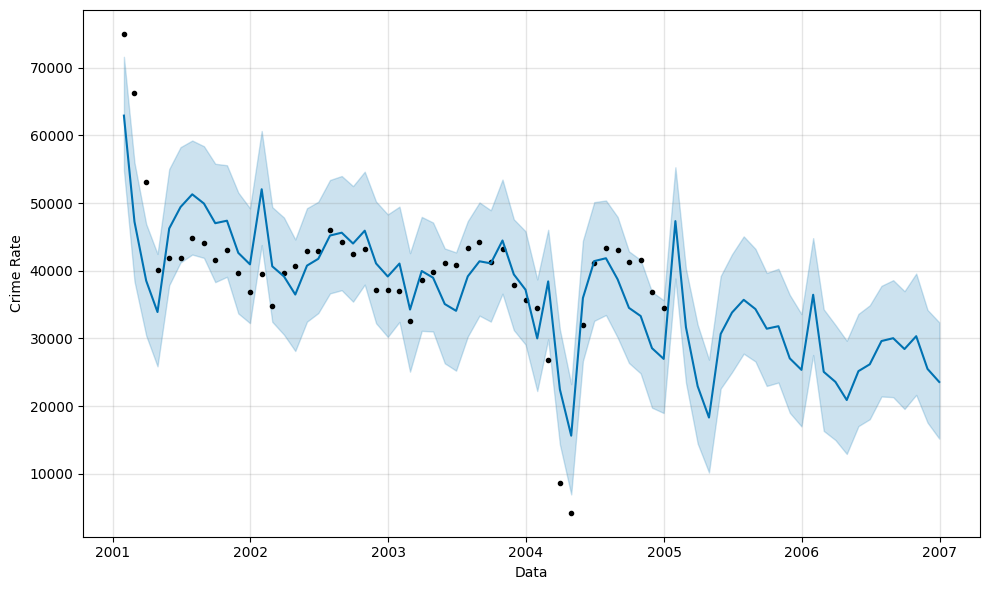

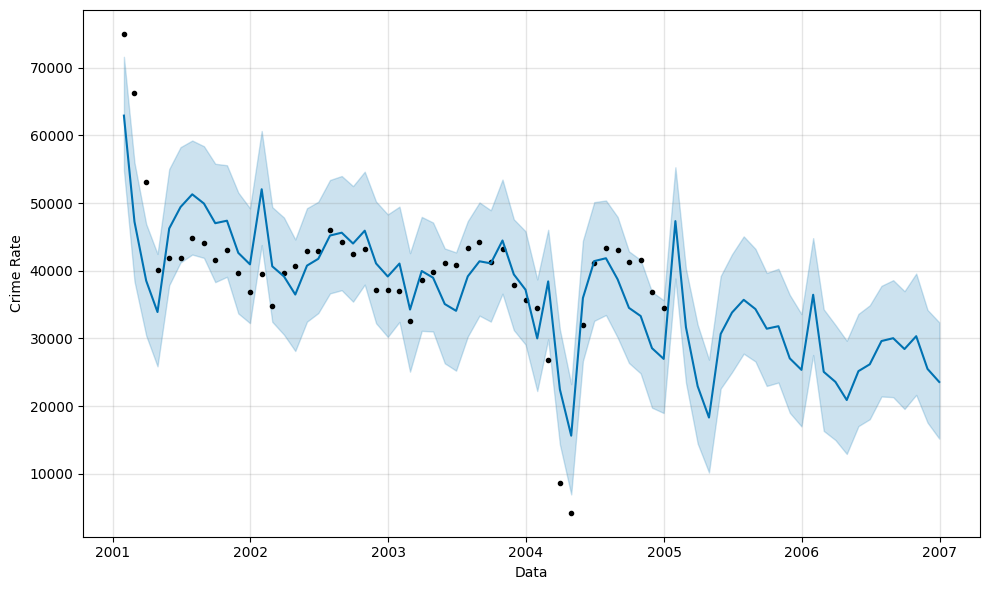

In [80]:
M.plot(forecast, xlabel ="Data", ylabel ="Crime Rate")

Blue lines
black dots


Save The Model

In [83]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json','w') as fout:
  json.dump(model_to_json(M), fout) #Save Model

In [84]:
#Load MODEL
with open('prophet_model.json','r') as fin:
  M1 = model_from_json(json.load(fin))

In [85]:
x = int(input("Enter Numbers Months to forecast"))

Enter Numbers Months to forecast18


Enter Numbers Months to forecast24

In [86]:
pred = M1.make_future_dataframe(periods=x,freq ='M')
forecast = M1.predict(pred)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [87]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,45272.306645,54394.096793,71665.083943,45272.306645,45272.306645,17657.256621,17657.256621,17657.256621,17657.256621,17657.256621,17657.256621,0.0,0.0,0.0,62929.563266
1,2001-02-28,44973.522999,38769.473368,55750.691783,44973.522999,44973.522999,2270.229758,2270.229758,2270.229758,2270.229758,2270.229758,2270.229758,0.0,0.0,0.0,47243.752757
2,2001-03-31,44642.726818,29123.681940,46846.650470,44642.726818,44642.726818,-6107.081565,-6107.081565,-6107.081565,-6107.081565,-6107.081565,-6107.081565,0.0,0.0,0.0,38535.645253
3,2001-04-30,44322.601483,25260.210400,41904.136373,44322.601483,44322.601483,-10415.304508,-10415.304508,-10415.304508,-10415.304508,-10415.304508,-10415.304508,0.0,0.0,0.0,33907.296975
4,2001-05-31,43991.805300,37485.053023,55150.316804,43991.805300,43991.805300,2263.205981,2263.205981,2263.205981,2263.205981,2263.205981,2263.205981,0.0,0.0,0.0,46255.011282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2006-02-28,25490.618433,17224.675454,33559.640365,25490.547195,25490.684121,-417.384656,-417.384656,-417.384656,-417.384656,-417.384656,-417.384656,0.0,0.0,0.0,25073.233777
62,2006-03-31,25159.867908,14928.257396,31971.602395,25159.787794,25159.941791,-1575.151012,-1575.151012,-1575.151012,-1575.151012,-1575.151012,-1575.151012,0.0,0.0,0.0,23584.716896
63,2006-04-30,24839.786755,11953.893790,29192.477325,24839.698736,24839.868668,-3934.726869,-3934.726869,-3934.726869,-3934.726869,-3934.726869,-3934.726869,0.0,0.0,0.0,20905.059886
64,2006-05-31,24509.036230,16834.055581,33245.177115,24508.941582,24509.126296,666.071193,666.071193,666.071193,666.071193,666.071193,666.071193,0.0,0.0,0.0,25175.107422


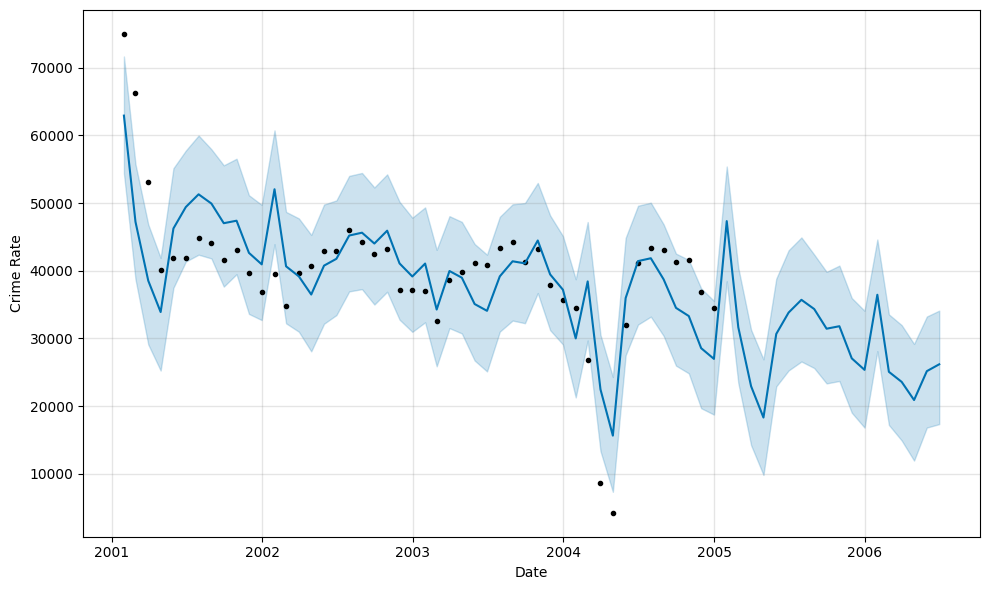

In [88]:
figure = M1.plot(forecast, xlabel='Date', ylabel ='Crime Rate')